In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import pymongo
import sys
import json
import os

In [151]:
df=pd.read_csv('Motor_vehicle_insurance_data.csv',sep=';')
for col in df.columns:
    if df[col].isnull().sum()>0:
        print(f"Column {col} has {df[col].isnull().sum()} null values")

Column Date_lapse has 70408 null values
Column Type_fuel has 1764 null values
Column Length has 10329 null values


C:\Users\joshi\AppData\Local\Temp\ipykernel_25360\2482879030.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('Motor_vehicle_insurance_data.csv',sep=';')


In [152]:
today = pd.Timestamp.today()
df['Date_lapse']=df['Date_lapse'].fillna(today)

In [153]:
df['Length']=df['Length'].fillna(df['Length'].mean())
df['Type_fuel']=df['Type_fuel'].fillna(df['Type_fuel'].mode()[0])


In [154]:
df.shape

(105555, 30)

In [155]:
df.head()

,ID,Date_start_contract,Date_last_renewal,Date_next_renewal,Date_birth,Date_driving_licence,Distribution_channel,Seniority,Policies_in_force,Max_policies,...,Area,Second_driver,Year_matriculation,Power,Cylinder_capacity,Value_vehicle,N_doors,Type_fuel,Length,Weight
0,1,05/11/2015,05/11/2015,05/11/2016,15/04/1956,20/03/1976,0,4,1,2,...,0,0,2004,80,599,7068.0,0,P,4.252007,190
1,1,05/11/2015,05/11/2016,05/11/2017,15/04/1956,20/03/1976,0,4,1,2,...,0,0,2004,80,599,7068.0,0,P,4.252007,190
2,1,05/11/2015,05/11/2017,05/11/2018,15/04/1956,20/03/1976,0,4,2,2,...,0,0,2004,80,599,7068.0,0,P,4.252007,190
3,1,05/11/2015,05/11/2018,05/11/2019,15/04/1956,20/03/1976,0,4,2,2,...,0,0,2004,80,599,7068.0,0,P,4.252007,190
4,2,26/09/2017,26/09/2017,26/09/2018,15/04/1956,20/03/1976,0,4,2,2,...,0,0,2004,80,599,7068.0,0,P,4.252007,190


In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105555 entries, 0 to 105554
Data columns (total 30 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    105555 non-null  int64  
 1   Date_start_contract   105555 non-null  object 
 2   Date_last_renewal     105555 non-null  object 
 3   Date_next_renewal     105555 non-null  object 
 4   Date_birth            105555 non-null  object 
 5   Date_driving_licence  105555 non-null  object 
 6   Distribution_channel  105555 non-null  object 
 7   Seniority             105555 non-null  int64  
 8   Policies_in_force     105555 non-null  int64  
 9   Max_policies          105555 non-null  int64  
 10  Max_products          105555 non-null  int64  
 11  Lapse                 105555 non-null  int64  
 12  Date_lapse            105555 non-null  object 
 13  Payment               105555 non-null  int64  
 14  Premium               105555 non-null  float64
 15  

In [9]:
data=df.to_dict(orient='records')
DB_NAME = "VehicleInsurance"
COLLECTION_NAME = "Proj1-Data"
CONNECTION_URL = "mongodb+srv://joshisparsh:url"

# above, either remove your credentials or delete the mongoDB resource bofore pushing it to github.

In [34]:
client = pymongo.MongoClient(CONNECTION_URL)
data_base = client[DB_NAME]
collection = data_base[COLLECTION_NAME]

In [47]:
from pymongo.errors import AutoReconnect
import time

MAX_RETRIES = 5
RETRY_DELAY = 3
batch_size = 50

for i in range(0, len(data), batch_size):
    batch = data[i:i+batch_size]
    for attempt in range(3):  # Retry max 3 times
        try:
            collection.insert_many(batch)
            print(f"✅ Inserted batch {i//batch_size + 1}")
            time.sleep(0.3)
            break
        except AutoReconnect as e:
            print(f"⚠️ Retry {attempt + 1} for batch {i//batch_size + 1}: {e}")
            time.sleep(2)
        except Exception as e:
            print(f"❌ Failed batch {i//batch_size + 1}: {e}")
            break


✅ Inserted batch 1
✅ Inserted batch 2
✅ Inserted batch 3
✅ Inserted batch 4
✅ Inserted batch 5
✅ Inserted batch 6
✅ Inserted batch 7
✅ Inserted batch 8
✅ Inserted batch 9
✅ Inserted batch 10
✅ Inserted batch 11
✅ Inserted batch 12
✅ Inserted batch 13
✅ Inserted batch 14
✅ Inserted batch 15
✅ Inserted batch 16
✅ Inserted batch 17
✅ Inserted batch 18
✅ Inserted batch 19
✅ Inserted batch 20
✅ Inserted batch 21
✅ Inserted batch 22
✅ Inserted batch 23
✅ Inserted batch 24
✅ Inserted batch 25
✅ Inserted batch 26
✅ Inserted batch 27
✅ Inserted batch 28
✅ Inserted batch 29
✅ Inserted batch 30
✅ Inserted batch 31
✅ Inserted batch 32
✅ Inserted batch 33
✅ Inserted batch 34
✅ Inserted batch 35
✅ Inserted batch 36
✅ Inserted batch 37
✅ Inserted batch 38
✅ Inserted batch 39
✅ Inserted batch 40
✅ Inserted batch 41
✅ Inserted batch 42
✅ Inserted batch 43
✅ Inserted batch 44
✅ Inserted batch 45
✅ Inserted batch 46
✅ Inserted batch 47
✅ Inserted batch 48
✅ Inserted batch 49
✅ Inserted batch 50
✅ Inserte

In [157]:
int_cat=[]
float_cat=[]
object_cat=[]
for col in df.columns:
    if df[col].dtype=='int64':
        int_cat.append(col)
    elif df[col].dtype=='float64':
        float_cat.append(col)
    elif df[col].dtype=='object':
        object_cat.append(col)
        
boolean_cat = []
categorical_cat = []
for col in object_cat:
    # Check if all non-null values are boolean
    if df[col].isin([True, False]).all():
        boolean_cat.append(col)
    else:
        categorical_cat.append(col)
            

In [158]:
int_cat

['ID',
 'Seniority',
 'Policies_in_force',
 'Max_policies',
 'Max_products',
 'Lapse',
 'Payment',
 'N_claims_year',
 'N_claims_history',
 'Type_risk',
 'Area',
 'Second_driver',
 'Year_matriculation',
 'Power',
 'Cylinder_capacity',
 'N_doors',
 'Weight']

In [159]:
float_cat

['Premium', 'Cost_claims_year', 'R_Claims_history', 'Value_vehicle', 'Length']

In [160]:
boolean_cat

[]

In [161]:
categorical_cat  #obj type columns  , including date columns

['Date_start_contract',
 'Date_last_renewal',
 'Date_next_renewal',
 'Date_birth',
 'Date_driving_licence',
 'Distribution_channel',
 'Date_lapse',
 'Type_fuel']

In [162]:
df.columns

Index(['ID', 'Date_start_contract', 'Date_last_renewal', 'Date_next_renewal',
       'Date_birth', 'Date_driving_licence', 'Distribution_channel',
       'Seniority', 'Policies_in_force', 'Max_policies', 'Max_products',
       'Lapse', 'Date_lapse', 'Payment', 'Premium', 'Cost_claims_year',
       'N_claims_year', 'N_claims_history', 'R_Claims_history', 'Type_risk',
       'Area', 'Second_driver', 'Year_matriculation', 'Power',
       'Cylinder_capacity', 'Value_vehicle', 'N_doors', 'Type_fuel', 'Length',
       'Weight'],
      dtype='object')

In [163]:
count=0
for entry in df['Cost_claims_year']:
    if entry==0:
       count+=1
print(f"Number of zero entries in Cost_claims_year: {count}") 
print(f"Percentage of zero entries in Cost_claims_year: {count/len(df)*100:.2f}%")  
df['Cost_claims_year'].describe()

Number of zero entries in Cost_claims_year: 85909
Percentage of zero entries in Cost_claims_year: 81.39%


count    105555.000000
mean        153.557305
std        1477.112362
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      260853.240000
Name: Cost_claims_year, dtype: float64

In [164]:
target1=df['Cost_claims_year']
df.drop(columns=['Cost_claims_year','ID','R_Claims_history'],inplace=True)


In [165]:
from scipy.stats import skew
from sklearn.preprocessing import PowerTransformer


In [166]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, target1, test_size=0.2, random_state=42)

# Only apply to numeric columns
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    if skew(X_train[col]) > 0.5:
        pt = PowerTransformer(method='yeo-johnson')
        X_train[col] = pt.fit_transform(X_train[[col]])
        X_test[col] = pt.transform(X_test[[col]])
        print(f"Applied PowerTransformer to {col} due to skewness: {skew(X_train[col])}")
    else:
        print(f"No transformation needed for {col}, skewness: {skew(X_train[col])}")



Applied PowerTransformer to Seniority due to skewness: 0.05444350838316816
Applied PowerTransformer to Policies_in_force due to skewness: 0.9456679426666397
Applied PowerTransformer to Max_policies due to skewness: 0.2673094396251911
Applied PowerTransformer to Max_products due to skewness: 3.6746648507883894
Applied PowerTransformer to Lapse due to skewness: 1.4727176722279207
Applied PowerTransformer to Payment due to skewness: 0.7743166115103545
Applied PowerTransformer to Premium due to skewness: 0.09273798344438587
Applied PowerTransformer to N_claims_year due to skewness: 1.6088909660068909
Applied PowerTransformer to N_claims_history due to skewness: 0.11403836469619968
No transformation needed for Type_risk, skewness: -1.8358140021506546
Applied PowerTransformer to Area due to skewness: 1.0143441555459956
Applied PowerTransformer to Second_driver due to skewness: 2.275255479076479
No transformation needed for Year_matriculation, skewness: -1.4255839830468506
No transformation n

In [167]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (84444, 27)
X_test shape: (21111, 27)


In [168]:
import pandas as pd
import numpy as np
from datetime import datetime
def feature_engineering(df):
    """
    Perform feature engineering on the DataFrame.
    """
    today = datetime(2020, 1, 1)

    df['Date_lapse'] = pd.to_datetime(df['Date_lapse'], errors='coerce')

    df['Date_lapse'] = df['Date_lapse'].fillna(today)
    df['Date_lapse'] = df['Date_lapse'].mask(df['Date_lapse'] > today, today)

    # Convert relevant date columns safely
    df['Date_lapse'] = pd.to_datetime(df['Date_lapse'], dayfirst=True, errors='coerce')
    df['Date_start_contract'] = pd.to_datetime(df['Date_start_contract'], dayfirst=True, errors='coerce')
    df['Date_driving_licence'] = pd.to_datetime(df['Date_driving_licence'], dayfirst=True, errors='coerce')
    df['Date_last_renewal'] = pd.to_datetime(df['Date_last_renewal'], dayfirst=True, errors='coerce')
    df['Date_next_renewal'] = pd.to_datetime(df['Date_next_renewal'], dayfirst=True, errors='coerce')

    # Age since lapse (if lapsed)
    df['Age'] = ((today - df['Date_lapse']).dt.days // 365).fillna(0).astype(int)

    # Vehicle age
    df['Vehicle_age'] = today.year - df['Year_matriculation'] if 'Year_matriculation' in df.columns else np.nan

    # Insurance duration (from start to lapse or today if not lapsed)
    df['Insurance_duration'] = ((df['Date_lapse'].fillna(today) - df['Date_start_contract']).dt.days//30).fillna(0).astype(int)

    # Licence age
    df['Licence_age'] = ((today - df['Date_driving_licence']).dt.days // 365).fillna(0).astype(int)

    # Insurance status (1 = active, 0 = terminated)
    df['Insurance_status'] = df['Date_lapse'].isna().astype(int)

    # Time between renewals
    df['next_claim_duration'] = (
        (df['Date_next_renewal'] - df['Date_last_renewal']).dt.days
    ).fillna(0).astype(int)

    # Drop unneeded date columns
    df = df.drop(columns=[
        'Date_start_contract',
        'Date_last_renewal',
        'Date_next_renewal',
        'Date_driving_licence',
        'Date_birth',
        'Date_lapse'
    ], errors='ignore')

    return df
x_train_engineered = feature_engineering(X_train)

C:\Users\joshi\AppData\Local\Temp\ipykernel_25360\2429789519.py:10: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date_lapse'] = pd.to_datetime(df['Date_lapse'], errors='coerce')


In [169]:
x_train_engineered.head()
x_train_engineered.shape

(84444, 27)

In [170]:
x_train_engineered.columns

Index(['Distribution_channel', 'Seniority', 'Policies_in_force',
       'Max_policies', 'Max_products', 'Lapse', 'Payment', 'Premium',
       'N_claims_year', 'N_claims_history', 'Type_risk', 'Area',
       'Second_driver', 'Year_matriculation', 'Power', 'Cylinder_capacity',
       'Value_vehicle', 'N_doors', 'Type_fuel', 'Length', 'Weight', 'Age',
       'Vehicle_age', 'Insurance_duration', 'Licence_age', 'Insurance_status',
       'next_claim_duration'],
      dtype='object')

In [171]:
for cols in x_train_engineered.columns:
    if x_train_engineered[cols].dtype == 'object':
        print(f"Column {cols} is of type object")

Column Distribution_channel is of type object
Column Type_fuel is of type object


In [172]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Only include columns that exist in x_train_engineered
categorical_cat = ['Distribution_channel', 'Type_fuel']

# Convert categorical columns to string type to avoid dtype issues
x_train_engineered[categorical_cat] = x_train_engineered[categorical_cat].astype(str)

encoder = ColumnTransformer(
    transformers=[
        ('ohe', OneHotEncoder(sparse_output=False, drop=None), categorical_cat)
    ],
    remainder='passthrough',
    verbose_feature_names_out=True
)




# Now you can check dtypes

x_train_encoded = encoder.fit_transform(x_train_engineered)
# Convert encoded NumPy array to DataFrame
feature_names = encoder.get_feature_names_out()


In [173]:
x_train_encoded_df = pd.DataFrame(x_train_encoded, columns=feature_names)

# Check for object-type columns
for col in x_train_encoded_df.columns:
    if x_train_encoded_df[col].dtype == 'object':
        print(f"Column {col} is of type object")
# Fit and transform the training data
x_train_encoded_df

,ohe__Distribution_channel_0,ohe__Distribution_channel_00/01/1900,ohe__Distribution_channel_1,ohe__Type_fuel_D,ohe__Type_fuel_P,remainder__Seniority,remainder__Policies_in_force,remainder__Max_policies,remainder__Max_products,remainder__Lapse,...,remainder__Value_vehicle,remainder__N_doors,remainder__Length,remainder__Weight,remainder__Age,remainder__Vehicle_age,remainder__Insurance_duration,remainder__Licence_age,remainder__Insurance_status,remainder__next_claim_duration
0,1.0,0.0,0.0,1.0,0.0,1.372321,-0.636621,1.605094,4.564057e-14,1.976297,...,0.397134,5.0,1.518043,1.177519,2.0,12.0,36.0,19.0,0.0,365.0
1,0.0,0.0,1.0,1.0,0.0,0.117199,-0.636621,1.271643,-2.959438e-15,-0.505509,...,0.330163,4.0,1.121606,1.068384,0.0,17.0,64.0,28.0,0.0,365.0
2,0.0,0.0,1.0,0.0,1.0,-0.523140,-0.636621,-0.968268,-2.959438e-15,-0.505509,...,0.192534,3.0,0.176213,-0.090149,0.0,11.0,39.0,16.0,0.0,365.0
3,0.0,0.0,1.0,1.0,0.0,-1.821256,-0.636621,-0.968268,-2.959438e-15,-0.505509,...,-0.723057,3.0,-1.597379,-0.664788,3.0,19.0,11.0,29.0,0.0,365.0
4,0.0,0.0,1.0,1.0,0.0,-0.523140,1.470201,1.271643,-2.959438e-15,-0.505509,...,0.594510,5.0,0.195369,0.197195,0.0,16.0,29.0,41.0,0.0,365.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84439,1.0,0.0,0.0,1.0,0.0,-0.160864,-0.636621,-0.968268,-2.959438e-15,-0.505509,...,1.289626,4.0,0.769947,0.464981,2.0,16.0,36.0,24.0,0.0,365.0
84440,0.0,0.0,1.0,1.0,0.0,-0.160864,-0.636621,-0.968268,-2.959438e-15,-0.505509,...,-0.721065,3.0,-1.255782,-0.356188,2.0,19.0,36.0,21.0,0.0,365.0
84441,0.0,0.0,1.0,0.0,1.0,-0.160864,-0.636621,1.271643,-2.959438e-15,-0.505509,...,-0.964481,5.0,-1.262528,-0.356188,0.0,21.0,42.0,31.0,0.0,365.0
84442,1.0,0.0,0.0,0.0,1.0,0.340416,-0.636621,0.624821,-2.959438e-15,-0.505509,...,0.056972,4.0,0.681962,-0.159690,1.0,31.0,48.0,42.0,0.0,366.0


In [174]:
x_train_encoded

array([[  1.,   0.,   0., ...,  19.,   0., 365.],
       [  0.,   0.,   1., ...,  28.,   0., 365.],
       [  0.,   0.,   1., ...,  16.,   0., 365.],
       ...,
       [  0.,   0.,   1., ...,  31.,   0., 365.],
       [  1.,   0.,   0., ...,  42.,   0., 366.],
       [  1.,   0.,   0., ...,  42.,   0., 366.]], shape=(84444, 30))

In [175]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_encoded= scaler.fit_transform(x_train_encoded_df)
x_train_encoded_df

,ohe__Distribution_channel_0,ohe__Distribution_channel_00/01/1900,ohe__Distribution_channel_1,ohe__Type_fuel_D,ohe__Type_fuel_P,remainder__Seniority,remainder__Policies_in_force,remainder__Max_policies,remainder__Max_products,remainder__Lapse,...,remainder__Value_vehicle,remainder__N_doors,remainder__Length,remainder__Weight,remainder__Age,remainder__Vehicle_age,remainder__Insurance_duration,remainder__Licence_age,remainder__Insurance_status,remainder__next_claim_duration
0,1.0,0.0,0.0,1.0,0.0,1.372321,-0.636621,1.605094,4.564057e-14,1.976297,...,0.397134,5.0,1.518043,1.177519,2.0,12.0,36.0,19.0,0.0,365.0
1,0.0,0.0,1.0,1.0,0.0,0.117199,-0.636621,1.271643,-2.959438e-15,-0.505509,...,0.330163,4.0,1.121606,1.068384,0.0,17.0,64.0,28.0,0.0,365.0
2,0.0,0.0,1.0,0.0,1.0,-0.523140,-0.636621,-0.968268,-2.959438e-15,-0.505509,...,0.192534,3.0,0.176213,-0.090149,0.0,11.0,39.0,16.0,0.0,365.0
3,0.0,0.0,1.0,1.0,0.0,-1.821256,-0.636621,-0.968268,-2.959438e-15,-0.505509,...,-0.723057,3.0,-1.597379,-0.664788,3.0,19.0,11.0,29.0,0.0,365.0
4,0.0,0.0,1.0,1.0,0.0,-0.523140,1.470201,1.271643,-2.959438e-15,-0.505509,...,0.594510,5.0,0.195369,0.197195,0.0,16.0,29.0,41.0,0.0,365.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84439,1.0,0.0,0.0,1.0,0.0,-0.160864,-0.636621,-0.968268,-2.959438e-15,-0.505509,...,1.289626,4.0,0.769947,0.464981,2.0,16.0,36.0,24.0,0.0,365.0
84440,0.0,0.0,1.0,1.0,0.0,-0.160864,-0.636621,-0.968268,-2.959438e-15,-0.505509,...,-0.721065,3.0,-1.255782,-0.356188,2.0,19.0,36.0,21.0,0.0,365.0
84441,0.0,0.0,1.0,0.0,1.0,-0.160864,-0.636621,1.271643,-2.959438e-15,-0.505509,...,-0.964481,5.0,-1.262528,-0.356188,0.0,21.0,42.0,31.0,0.0,365.0
84442,1.0,0.0,0.0,0.0,1.0,0.340416,-0.636621,0.624821,-2.959438e-15,-0.505509,...,0.056972,4.0,0.681962,-0.159690,1.0,31.0,48.0,42.0,0.0,366.0


In [179]:
from sklearn.feature_selection import VarianceThreshold

# Set a threshold: 0 means remove features that have the same value in all samples
# You can try a small threshold like 0.01 or 0.02 if you want to be more aggressive
selector = VarianceThreshold(threshold=0.1)

# Apply on your training data
x_train_reduced = selector.fit_transform(x_train_encoded_df)

# For future use on validation or test data, you must use the same selector:


# If you want to know which features were retained:
selected_columns = x_train_encoded_df.columns[selector.get_support()]
x_train_encoded_df = pd.DataFrame(x_train_reduced, columns=selected_columns)


In [180]:
x_train_encoded.shape

(84444, 30)

In [181]:
y_train

72716       0.00
95053      76.33
98446     583.93
41836       0.00
16050       0.00
           ...  
54886       0.00
76820       0.00
103694      0.00
860       158.36
15795      62.87
Name: Cost_claims_year, Length: 84444, dtype: float64

In [182]:
X_train_new, X_val, y_train_new, y_val = train_test_split(
    x_train_encoded_df, y_train, test_size=0.2, random_state=42
)


In [183]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import RidgeCV

ridge = RidgeCV(alphas=[0.01,0.05,0.1, 0.75 ,1 ,2,5,10,15,20,25,30,35,50], cv=6)
ridge.fit(X_train_new,y_train_new)


RidgeCV(alphas=[0.01, 0.05, 0.1, 0.75, 1, 2, 5, 10, 15, 20, 25, 30, 35, 50],
        cv=6)

In [184]:
for cols in x_train_encoded_df.columns:
    if x_train_encoded_df[cols].dtype == 'object':
        print(f"Column {cols} is of type object")

In [185]:
y= ridge.predict(X_val)

In [186]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_val,y)
r2 = r2_score(y_val, y)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 5217379.000634279
R^2 Score: 0.02469963042512069


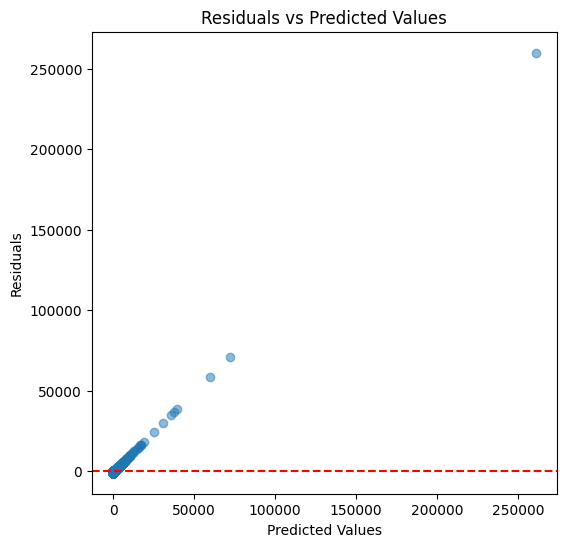

In [187]:
#calculating the residuals
residuals = y_val - y
# Plotting the residuals
plt.figure(figsize=(6, 6))
plt.scatter(y_val, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()


In [188]:
y_val.shape

(16889,)

In [189]:
y.shape

(16889,)

In [190]:
import numpy as np
from scipy.stats import uniform, randint
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
xgb = XGBRegressor(objective='reg:squarederror', n_estimators=400, random_state=42)

param_dist = {
    'learning_rate': uniform(0.01, 0.5),
    'max_depth': randint(3, 11),
    'min_child_weight': randint(1, 6),
}

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=20,  # Try 100 random combinations
    scoring='r2',
    cv=3,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

random_search.fit(x_train_encoded_df, y_train)

print("✅ Best Parameters:", random_search.best_params_)
print("🏆 Best R2 Score on CV:", random_search.best_score_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


KeyboardInterrupt: 

In [197]:
x_test_encoded=feature_engineering(X_test)
x_test_encoded.shape


(21111, 27)

In [198]:
x_train_encoded

array([[  1.,   0.,   0., ...,  19.,   0., 365.],
       [  0.,   0.,   1., ...,  28.,   0., 365.],
       [  0.,   0.,   1., ...,  16.,   0., 365.],
       ...,
       [  0.,   0.,   1., ...,  31.,   0., 365.],
       [  1.,   0.,   0., ...,  42.,   0., 366.],
       [  1.,   0.,   0., ...,  42.,   0., 366.]], shape=(84444, 30))

In [199]:
x_test_encoded.columns

Index(['Distribution_channel', 'Seniority', 'Policies_in_force',
       'Max_policies', 'Max_products', 'Lapse', 'Payment', 'Premium',
       'N_claims_year', 'N_claims_history', 'Type_risk', 'Area',
       'Second_driver', 'Year_matriculation', 'Power', 'Cylinder_capacity',
       'Value_vehicle', 'N_doors', 'Type_fuel', 'Length', 'Weight', 'Age',
       'Vehicle_age', 'Insurance_duration', 'Licence_age', 'Insurance_status',
       'next_claim_duration'],
      dtype='object')

In [200]:
x_test_encoded

,Distribution_channel,Seniority,Policies_in_force,Max_policies,Max_products,Lapse,Payment,Premium,N_claims_year,N_claims_history,...,N_doors,Type_fuel,Length,Weight,Age,Vehicle_age,Insurance_duration,Licence_age,Insurance_status,next_claim_duration
40515,1,-0.523140,1.470201,1.271643,-2.959438e-15,-0.505509,-0.685172,1.714463,-0.479122,-1.179999,...,5,D,0.886165,0.454309,1,4,32,12,0,365
28723,1,-1.028494,1.470201,0.624821,-2.959438e-15,-0.505509,-0.685172,-0.557044,-0.479122,-1.179999,...,5,P,1.286601,0.528947,0,16,30,27,0,365
62581,0,0.340416,-0.636621,-0.968268,-2.959438e-15,-0.505509,-0.685172,-0.592218,-0.479122,-0.170896,...,5,D,-0.207447,0.164918,0,18,74,24,0,366
103419,1,-0.160864,1.470201,1.271643,-2.959438e-15,-0.505509,-0.685172,-0.869388,2.131826,1.180397,...,4,D,1.286601,0.658670,0,19,44,27,0,365
81627,0,0.340416,-0.636621,-0.968268,-2.959438e-15,-0.505509,-0.685172,0.286721,-0.479122,-0.170896,...,4,P,0.947099,0.141227,0,11,77,47,0,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35379,1,0.117199,1.722836,1.271643,-2.959438e-15,-0.505509,1.459488,2.152318,-0.479122,0.325574,...,5,D,0.832038,0.560888,0,6,70,36,0,365
41283,0,0.117199,-0.636621,1.605094,-2.959438e-15,-0.505509,-0.685172,0.588340,-0.479122,-0.170896,...,3,D,1.424773,0.528947,0,18,38,35,0,365
30902,0,0.818012,-0.636621,-0.968268,-2.959438e-15,1.976297,1.459488,-0.403291,2.043115,1.041247,...,4,P,0.554081,0.261656,0,20,121,17,0,365
9207,1,0.818012,1.722836,1.605094,-2.959438e-15,-0.505509,1.459488,-0.427175,-0.479122,-0.170896,...,5,D,-0.929436,-0.231579,0,16,38,29,0,365


In [201]:
x_test_encoded[categorical_cat] = x_test_encoded[categorical_cat].astype(str)
x_test_encoded=encoder.transform(x_test_encoded)
print(x_test_encoded.shape)
print(y_test.shape)

(21111, 30)
(21111,)


In [202]:
res_pred= xgb.predict(x_test_encoded)
y_pred= ridge.predict(x_test_encoded)
y_final_pred=   y_pred + res_pred  


In [203]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test,y_final_pred)
r2 = r2_score(y_test, y_final_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 2769570.853672357
R^2 Score: -0.8357748203643836
